We will predict employee salaries from different employee characteristics. We are going to use a simple supervised learning techniques(linear regression). We want to build a simple model to determine how well Years Worked predicts an employee’s salary.

In [10]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import seaborn as sns
%matplotlib inline
import sklearn.preprocessing as preprocessing

### Question 1

Split your data into a training and test set. Leave the test set for now. Examine the training data for missing and extreme values. Create histograms to show the distribution of the variables and a scatterplot showing the relationship between Years Worked and Salary. Are the data appropriate for linear regression? Is there anything that needs to be transformed or edited first?

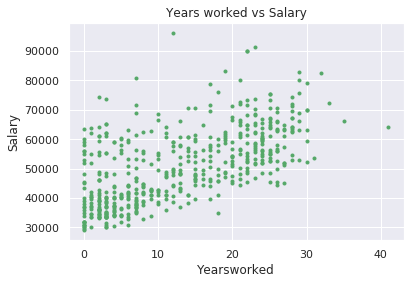

In [2]:
df = pd.read_csv('salary.csv')
salary = df['salary'] # our y-value(dependent variable) 
yearsworked = df['yearsworked'] # our x-value(independent variable)
# making a scatter plot 
sns.set()
_ = plt.plot(yearsworked, salary, marker='.', linestyle='none', color='g')
_ = plt.xlabel('Yearsworked')
_ = plt.ylabel('Salary')
_ = plt.title('Years worked vs Salary')
_ = plt.show()

The first assumption as seen in the scatter graph above has been satisfied. The dependent & independent variabels show a linear relationship

In [12]:
data = pd.DataFrame(yearsworked, salary)
cols = data.columns
data_df = pd.DataFrame(data)
data_df

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data_df)
data_df_normalised = pd.DataFrame(np_scaled, columns=cols)
data_df_normalised

model = smf.ols('salary ~ yearsworked', data_df_normalised).fit()
print(model.summary())

/home/recruit/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/recruit/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


ValueError: zero-size array to reduction operation maximum which has no identity